In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

### Preparing Training Data

In [5]:
training_data_length = 1024
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [(train_data[i], train_labels[i]) for i in range(train_data_length)]

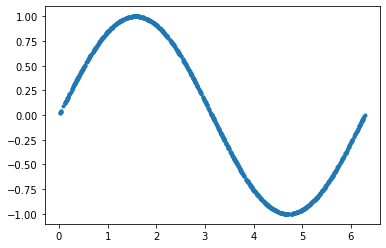

In [6]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [7]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

### Discriminator

In [8]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [9]:
discriminator = Discriminator()

### Generator

In [10]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [11]:
generator = Generator()

### Training

In [12]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [13]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [14]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.12408190965652466
Epoch: 0 Loss G.: 2.4710776805877686
Epoch: 10 Loss D.: 0.603076159954071
Epoch: 10 Loss G.: 0.9722558259963989
Epoch: 20 Loss D.: 0.6810697317123413
Epoch: 20 Loss G.: 0.9779403805732727
Epoch: 30 Loss D.: 0.6485538482666016
Epoch: 30 Loss G.: 0.8488448262214661
Epoch: 40 Loss D.: 0.6850412487983704
Epoch: 40 Loss G.: 0.8908053636550903
Epoch: 50 Loss D.: 0.7209122776985168
Epoch: 50 Loss G.: 0.7347447276115417
Epoch: 60 Loss D.: 0.6934809684753418
Epoch: 60 Loss G.: 0.7246147990226746
Epoch: 70 Loss D.: 0.6461632251739502
Epoch: 70 Loss G.: 0.8498620986938477
Epoch: 80 Loss D.: 0.6630169153213501
Epoch: 80 Loss G.: 0.7230924367904663
Epoch: 90 Loss D.: 0.6681651473045349
Epoch: 90 Loss G.: 0.6751986145973206
Epoch: 100 Loss D.: 0.5815517902374268
Epoch: 100 Loss G.: 0.8912873268127441
Epoch: 110 Loss D.: 0.6243754625320435
Epoch: 110 Loss G.: 0.9213064908981323
Epoch: 120 Loss D.: 0.687585711479187
Epoch: 120 Loss G.: 0.7774009108543396
Epoch: 13

### Samples generated by GAN

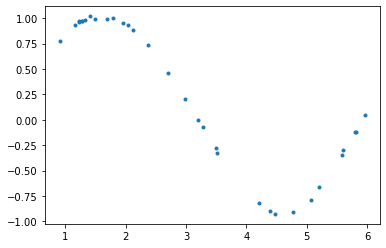

In [15]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")